# Importing packages and dataset information

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import *

In [3]:
diabetes=pd.read_csv('diabetes.csv')

In [4]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
#preprocessing
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# To check for outliers

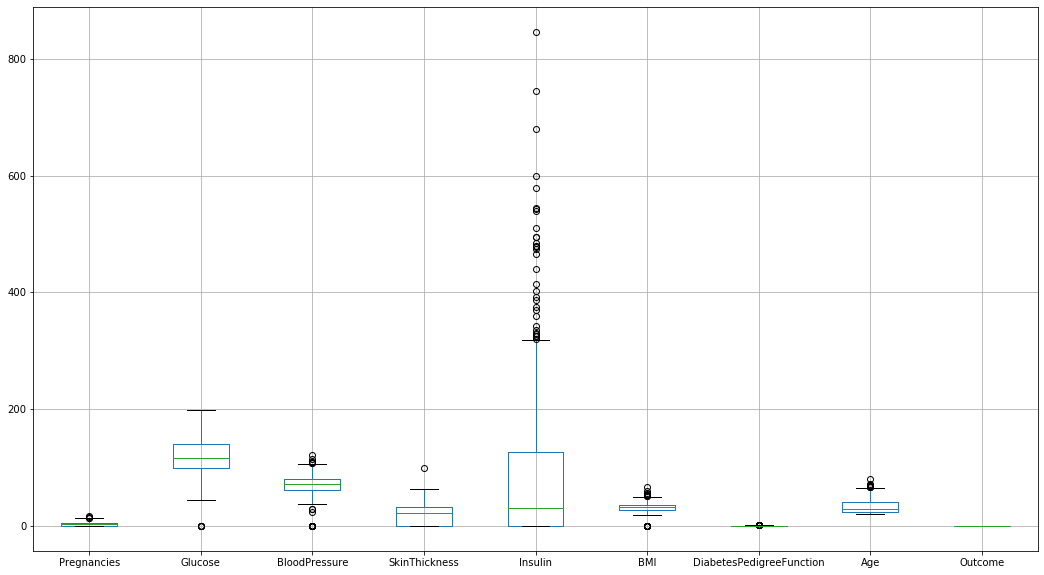

In [8]:
diabetes.boxplot(figsize=(18, 10))

# Correlation heatmap

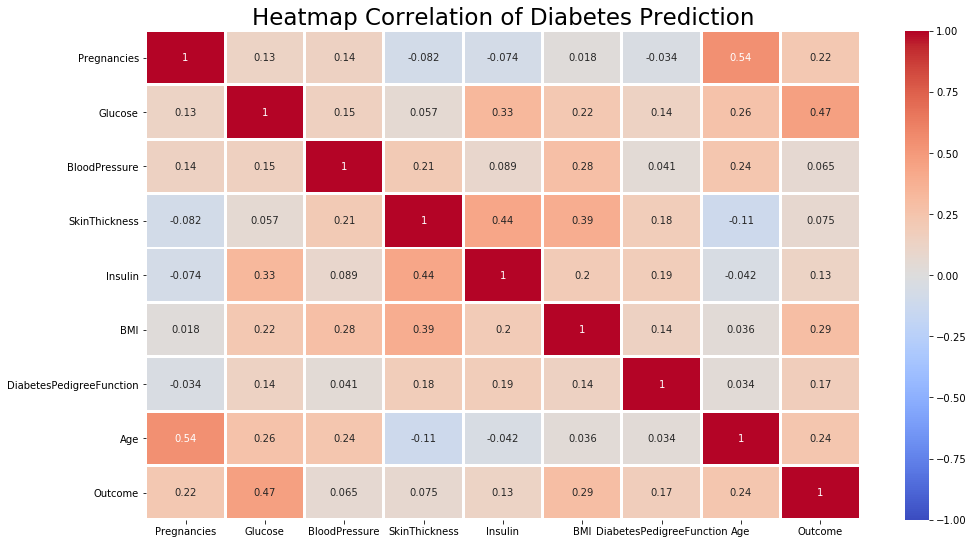

In [9]:
corrmatrix = diabetes.corr()
plt.figure(figsize=(16,9))
sns.heatmap(corrmatrix, annot=True,linewidth = 2, vmin=-1, vmax=1, center= 0,cmap= 'coolwarm')
plt.title("Heatmap Correlation of Diabetes Prediction", fontsize = 23)
plt.show()

In [10]:
# We chose outcome as our target variable
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x= diabetes.drop('Outcome',axis=1)
Y=diabetes[['Outcome']]

#scaling
sc = StandardScaler()
X = sc.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 19)

# Logistic Regression

In [11]:
#fitting models and checking accuracies
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(random_state=19)
parameter_grid_lr = {'C': [0.01, 0.1, 1, 2, 10, 100], 'penalty': ['l1', 'l2']}

gridsearch_lr = GridSearchCV(lr, parameter_grid_lr)
gridsearch_lr.fit(X_train, y_train);

#Get best hyperparameters
gridsearch_lr.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [12]:
lr_best = LogisticRegression(C=0.1,penalty='l2',random_state=19)
lr_best.fit(X_train, y_train)

train_acc_lr=lr_best.score(X_train,y_train)*100
test_acc_lr=lr_best.score(X_test,y_test)*100
print ("Train accuracy ={:.2f}%".format(lr_best.score(X_train,y_train)*100))
print ("Test accuracy ={:.2f}%".format(lr_best.score(X_test,y_test)*100))

Train accuracy =77.08%
Test accuracy =78.12%


In [13]:
y_pred_lr=lr_best.predict(X_test)

#This is the confusion matrix:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_lr))

[[117  12]
 [ 30  33]]


In [14]:
#Checking performance our model with classification report
print(classification_report(y_test, y_pred_lr))

#Checking performance our model with ROC Score
roc_score_lr=roc_auc_score(y_test, y_pred_lr)
print("Area Under the Curve = {:.2f}%".format(roc_score_lr*100))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       129
           1       0.73      0.52      0.61        63

    accuracy                           0.78       192
   macro avg       0.76      0.72      0.73       192
weighted avg       0.78      0.78      0.77       192

Area Under the Curve = 71.54%


In [15]:
#Calculating F1, prescision and recall scores
from sklearn.metrics import *

print("F1 score ={:.2f}%".format(f1_score(y_test, y_pred_lr, average="macro")*100))
print("Precision score ={:.2f}%".format(precision_score(y_test, y_pred_lr, average="macro")*100))
print("Recall score ={:.2f}%".format(recall_score(y_test, y_pred_lr, average="macro")*100)) 

F1 score =72.95%
Precision score =76.46%
Recall score =71.54%


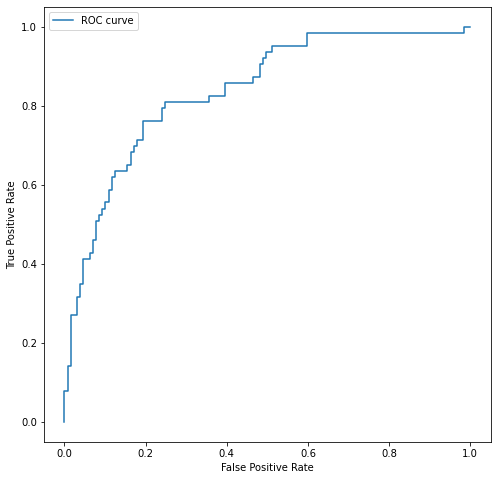

In [16]:
#Drawing the ROC curve 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import numpy as np
fpr_dt_1, tpr_dt_1,_=roc_curve(y_test,lr_best.predict_proba(X_test)[:,1])
plt.plot(fpr_dt_1,tpr_dt_1,label="ROC curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.gcf().set_size_inches(8, 8)
plt.show()

# Random Forest

In [17]:
#fitting models and checking accuracies
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=19)

#List Hyperparameters that we want to tune.

parameter_grid_rf={'n_estimators':[5,7,9,11],'max_depth':[3,4,5],'max_leaf_nodes':[10,15,20],'min_samples_split':[10,15,20,25]}
gridsearch_rf = GridSearchCV(rf, parameter_grid_rf)
gridsearch_rf.fit(X_train, y_train);

#Get best hyperparameters
gridsearch_rf.best_params_

{'max_depth': 5,
 'max_leaf_nodes': 10,
 'min_samples_split': 20,
 'n_estimators': 11}

In [18]:
rf_best = RandomForestClassifier(max_depth=5,max_leaf_nodes=10,min_samples_split=20,n_estimators=11,random_state=19)
rf_best.fit(X_train, y_train)

train_acc_rf=rf_best.score(X_train,y_train)*100
test_acc_rf=rf_best.score(X_test,y_test)*100
print ("Train accuracy ={:.2f}%".format(rf_best.score(X_train,y_train)*100))
print ("Test accuracy ={:.2f}%".format(rf_best.score(X_test,y_test)*100))

Train accuracy =79.86%
Test accuracy =79.17%


In [19]:
y_pred_rf=rf_best.predict(X_test)

#This is the confusion matrix:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_rf))

[[115  14]
 [ 26  37]]


In [20]:
#Checking performance our model with classification report
print(classification_report(y_test, y_pred_rf))

#Checking performance our model with ROC Score
roc_score_rf=roc_auc_score(y_test, y_pred_rf)
print("Area Under the Curve = {:.2f}%".format(roc_score_rf*100))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       129
           1       0.73      0.59      0.65        63

    accuracy                           0.79       192
   macro avg       0.77      0.74      0.75       192
weighted avg       0.79      0.79      0.79       192

Area Under the Curve = 73.94%


In [21]:
#Calculating F1, prescision and recall scores
from sklearn.metrics import *

print("F1 score ={:.2f}%".format(f1_score(y_test, y_pred_rf, average="macro")*100))
f1_rf=f1_score(y_test, y_pred_rf, average="macro")*100
print("Precision score ={:.2f}%".format(precision_score(y_test, y_pred_rf, average="macro")*100))
precision_rf=precision_score(y_test, y_pred_rf, average="macro")*100
print("Recall score ={:.2f}%".format(recall_score(y_test, y_pred_rf, average="macro")*100)) 
recall_rf=recall_score(y_test, y_pred_rf, average="macro")*100

F1 score =75.05%
Precision score =77.05%
Recall score =73.94%


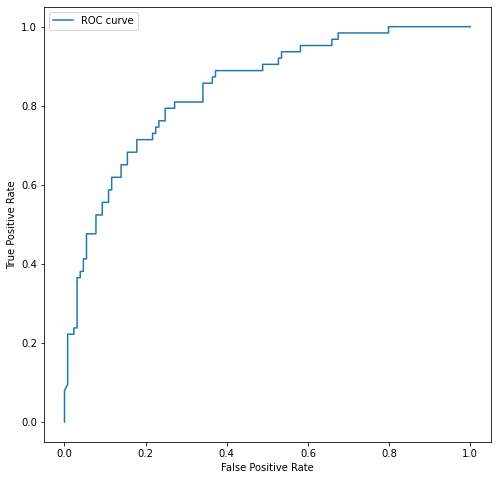

In [22]:
#Drawing the ROC curve 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import numpy as np
fpr_dt_1, tpr_dt_1,_=roc_curve(y_test,rf_best.predict_proba(X_test)[:,1])
plt.plot(fpr_dt_1,tpr_dt_1,label="ROC curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.gcf().set_size_inches(8, 8)
plt.show()

# XGBOOST

In [23]:
from xgboost import XGBClassifier
xg=XGBClassifier(random_state=19)

#List Hyperparameters that we want to tune.

parameter_grid_xg={'learning_rate':[0.05, 0.10, 0.15, 0.20],'max_depth':[3,4,5],'gamma':[ 0.0, 0.1, 0.2 , 0.3]}
gridsearch_xg = GridSearchCV(xg, parameter_grid_xg)
gridsearch_xg.fit(X_train, y_train);

#Get best hyperparameters
gridsearch_xg.best_params_

{'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 3}

In [24]:
xg_best =XGBClassifier(gamma=0.1,learning_rate=0.2,max_depth=3,random_state=19)
xg_best.fit(X_train, y_train)

train_acc_xg=xg_best.score(X_train,y_train)*100
test_acc_xg=xg_best.score(X_test,y_test)*100
print ("Train accuracy ={:.2f}%".format(xg_best.score(X_train,y_train)*100))
print ("Test accuracy ={:.2f}%".format(xg_best.score(X_test,y_test)*100))

Train accuracy =95.14%
Test accuracy =79.69%


In [25]:
y_pred_xg=xg_best.predict(X_test)

#This is the confusion matrix:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_xg))

[[113  16]
 [ 23  40]]


In [26]:
#Checking performance our model with classification report
print(classification_report(y_test, y_pred_xg))

#Checking performance our model with ROC Score
roc_score_xg=roc_auc_score(y_test, y_pred_xg)
print("Area Under the Curve = {:.2f}%".format(roc_score_xg*100))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       129
           1       0.71      0.63      0.67        63

    accuracy                           0.80       192
   macro avg       0.77      0.76      0.76       192
weighted avg       0.79      0.80      0.79       192

Area Under the Curve = 75.54%


In [27]:
#Calculating F1, prescision and recall scores
from sklearn.metrics import *

print("F1 score ={:.2f}%".format(f1_score(y_test, y_pred_xg, average="macro")*100))
f1_xg=f1_score(y_test, y_pred_xg, average="macro")*100
print("Precision score ={:.2f}%".format(precision_score(y_test, y_pred_xg, average="macro")*100))
precision_xg=precision_score(y_test, y_pred_xg, average="macro")*100
print("Recall score ={:.2f}%".format(recall_score(y_test, y_pred_xg, average="macro")*100)) 
recall_xg=recall_score(y_test, y_pred_xg, average="macro")*100

F1 score =76.25%
Precision score =77.26%
Recall score =75.54%


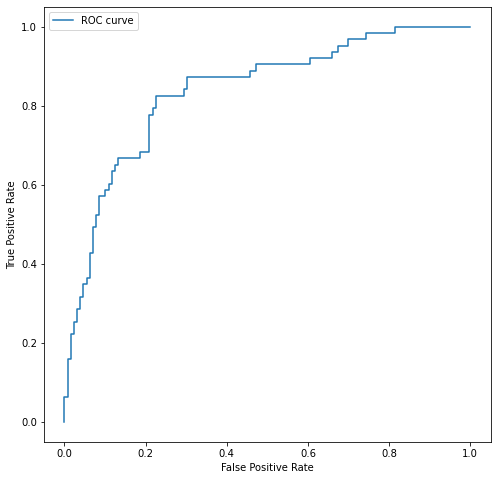

In [28]:
#Drawing the ROC curve 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import numpy as np
fpr_dt_1, tpr_dt_1,_=roc_curve(y_test,xg_best.predict_proba(X_test)[:,1])
plt.plot(fpr_dt_1,tpr_dt_1,label="ROC curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.gcf().set_size_inches(8, 8)
plt.show()

# SVM

In [29]:
from sklearn import svm

#List Hyperparameters that we want to tune.
model_svm = svm.SVC(probability=True,random_state=19) 

parameter_grid_svm={'C':[0.05,0.1,0.2],'kernel':['rbf','linear'],'gamma':[0.1,0.2,0.3]}
gridsearch_svm = GridSearchCV(model_svm, parameter_grid_svm)
gridsearch_svm.fit(X_train, y_train);

#Get best hyperparameters
gridsearch_svm.best_params_

{'C': 0.2, 'gamma': 0.1, 'kernel': 'rbf'}

In [30]:
svm_best =svm.SVC(C=0.2,gamma=0.1,kernel='rbf',probability=True,random_state=19) 
svm_best.fit(X_train, y_train)

train_acc_svm=svm_best.score(X_train,y_train)*100
test_acc_svm=svm_best.score(X_test,y_test)*100
print ("Train accuracy ={:.2f}%".format(svm_best.score(X_train,y_train)*100))
print ("Test accuracy ={:.2f}%".format(svm_best.score(X_test,y_test)*100))

Train accuracy =78.47%
Test accuracy =77.60%


In [31]:
y_pred_svm=svm_best.predict(X_test)

#This is the confusion matrix:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_svm))

[[119  10]
 [ 33  30]]


In [32]:
#Checking performance our model with classification report
print(classification_report(y_test, y_pred_svm))

#Checking performance our model with ROC Score
roc_score_svm=roc_auc_score(y_test, y_pred_svm)
print("Area Under the Curve = {:.2f}%".format(roc_score_svm*100))

              precision    recall  f1-score   support

           0       0.78      0.92      0.85       129
           1       0.75      0.48      0.58        63

    accuracy                           0.78       192
   macro avg       0.77      0.70      0.71       192
weighted avg       0.77      0.78      0.76       192

Area Under the Curve = 69.93%


In [33]:
#Calculating F1, prescision and recall scores
from sklearn.metrics import *

print("F1 score ={:.2f}%".format(f1_score(y_test, y_pred_svm, average="macro")*100))
print("Precision score ={:.2f}%".format(precision_score(y_test, y_pred_svm, average="macro")*100))
print("Recall score ={:.2f}%".format(recall_score(y_test, y_pred_svm, average="macro")*100))  

F1 score =71.47%
Precision score =76.64%
Recall score =69.93%


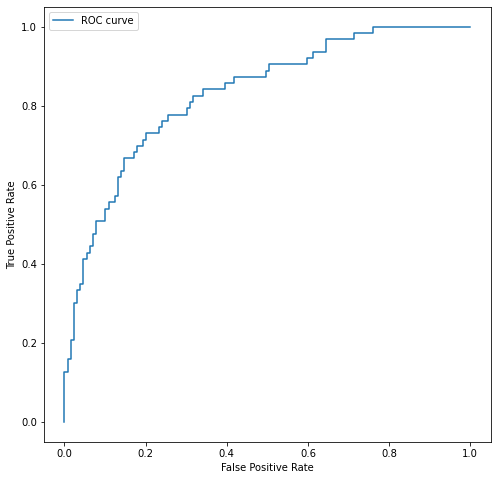

In [34]:
#Drawing the ROC curve 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import numpy as np
fpr_dt_1, tpr_dt_1,_=roc_curve(y_test,svm_best.predict_proba(X_test)[:,1])
plt.plot(fpr_dt_1,tpr_dt_1,label="ROC curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.gcf().set_size_inches(8, 8)
plt.show()

# KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from math import *
k = sqrt(768)
k=round(k) #k=28 #range because we got k=28 for 768 observations

knn = KNeighborsClassifier()

#List Hyperparameters that we want to tune.

parameter_grid_knn={'n_neighbors': list(range(25,35)),'p':[1,2]}
gridsearch_knn = GridSearchCV(knn, parameter_grid_knn)
gridsearch_knn.fit(X_train, y_train);

#Get best hyperparameters
gridsearch_knn.best_params_

{'n_neighbors': 33, 'p': 2}

In [36]:
knn_best = KNeighborsClassifier() 
knn_best.fit(X_train, y_train)

train_acc_knn=knn_best.score(X_train,y_train)*100
test_acc_knn=knn_best.score(X_test,y_test)*100
print ("Train accuracy ={:.2f}%".format(knn_best.score(X_train,y_train)*100))
print ("Test accuracy ={:.2f}%".format(knn_best.score(X_test,y_test)*100))

Train accuracy =81.60%
Test accuracy =75.52%


In [37]:
y_pred_knn=knn_best.predict(X_test)

#This is the confusion matrix:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_knn))

[[115  14]
 [ 33  30]]


In [38]:
#Checking performance our model with classification report
print(classification_report(y_test, y_pred_knn))

#Checking performance our model with ROC Score
roc_score_knn=roc_auc_score(y_test, y_pred_knn)
print("Area Under the Curve = {:.2f}%".format(roc_score_knn*100))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       129
           1       0.68      0.48      0.56        63

    accuracy                           0.76       192
   macro avg       0.73      0.68      0.70       192
weighted avg       0.75      0.76      0.74       192

Area Under the Curve = 68.38%


In [39]:
#Calculating F1, prescision and recall scores
from sklearn.metrics import *

print("F1 score ={:.2f}%".format(f1_score(y_test, y_pred_knn, average="macro")*100))
print("Precision score ={:.2f}%".format(precision_score(y_test, y_pred_knn, average="macro")*100))
print("Recall score ={:.2f}%".format(recall_score(y_test, y_pred_knn, average="macro")*100))  

F1 score =69.55%
Precision score =72.94%
Recall score =68.38%


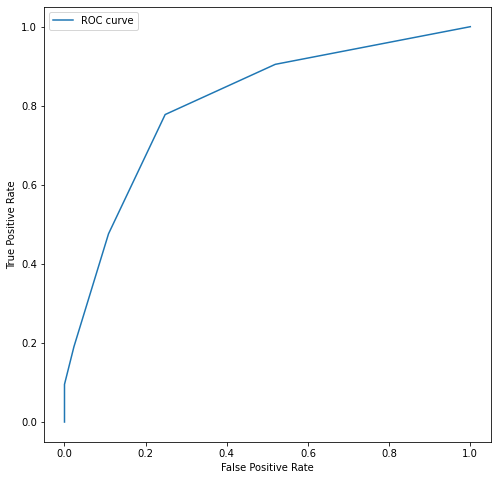

In [40]:
#Drawing the ROC curve 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import numpy as np
fpr_dt_1, tpr_dt_1,_=roc_curve(y_test,knn_best.predict_proba(X_test)[:,1])
plt.plot(fpr_dt_1,tpr_dt_1,label="ROC curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.gcf().set_size_inches(8, 8)
plt.show()

# Comparing accuracies of all the algorithms

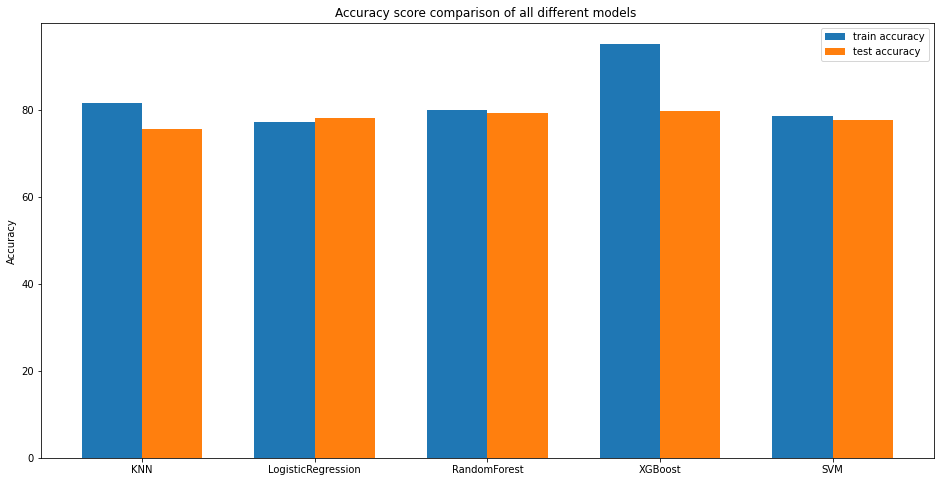

In [41]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# set width of bar
#barWidth = 0.25

train_accuracies = [train_acc_knn,train_acc_lr,train_acc_rf,train_acc_xg,train_acc_svm]
test_accuracies  = [test_acc_knn,test_acc_lr,test_acc_rf,test_acc_xg,test_acc_svm]

labels = ['KNN', 'LogisticRegression', 'RandomForest','XGBoost','SVM']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rec1 = ax.bar(x - width/2, train_accuracies, width, label='train accuracy')
rec2 = ax.bar(x + width/2, test_accuracies, width, label='test accuracy')


ax.set_ylabel('Accuracy')
ax.set_title('Accuracy score comparison of all different models ')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='best')

plt.gcf().set_size_inches(16, 8)
plt.show()

# Comparing the accuracy, F1, precision and recall scores of the two best performing algorithms (XGBoost and RandomForest)

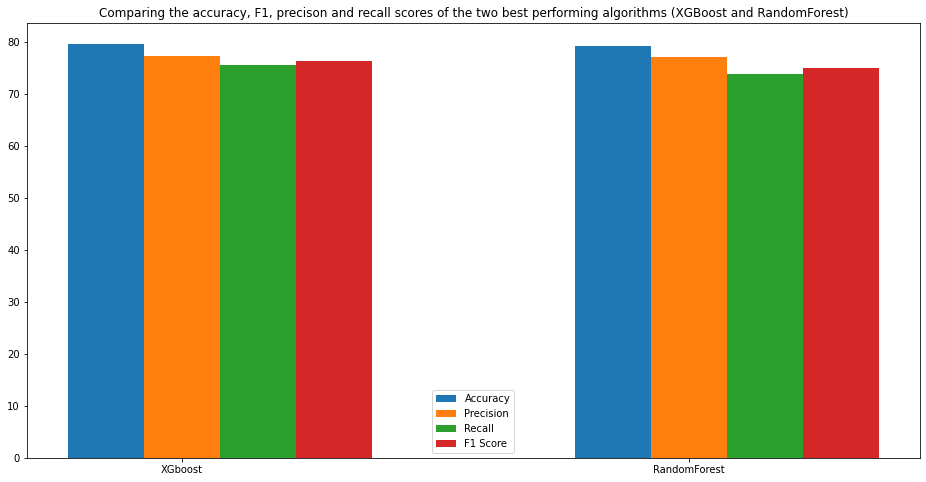

In [42]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# set width of bar
#barWidth = 0.25

test_accuracies  = [test_acc_xg,test_acc_rf]
precision_scores = [precision_xg,precision_rf]
recall_scores = [recall_xg,recall_rf]
f1_scores = [f1_xg,f1_rf]

labels = ['XGboost','RandomForest']
x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots()
rec1 = ax.bar(x , test_accuracies, width, label='Accuracy')
rec2 = ax.bar(x + width, precision_scores, width, label='Precision')
rec3 = ax.bar(x + width*2, recall_scores, width, label='Recall')
rec4 = ax.bar(x + width*3, f1_scores, width, label='F1 Score')


ax.set_title('Comparing the accuracy, F1, precison and recall scores of the two best performing algorithms (XGBoost and RandomForest)')
ax.set_xticks(x+width)
ax.set_xticklabels(labels)
ax.legend(loc='best')

plt.gcf().set_size_inches(16, 8)
plt.show()